# Практическая работа №3: Кластерный анализ.  
Выполнил студент группы 0373: Логунко Матвей. Вариант 12.

## Цель работы
Освоение основных понятий и некоторых методов кластерного анализа, в частности, метода k-means и метода поиска сгущений.

## Постановка задачи
Дано конечное множество из объектов, представленных двумя признаками (в качестве этого множества принимаем исходную двумерную выборку, сформированную ранее в практической работе №2). Выполнить разбиение исходного множества объектов на конечное число подмножеств (кластеров) с использованием метода k-means и метода поиска сгущений. Полученные результаты содержательно проинтерпретировать.

## Основные теоретические положения

*Кластерный анализ* - задача разбиения заданной выборки на подмножества (кластеры), так, чтобы кластер состоял из схожих объектов, а объекты разных кластеров существенно отличались.  
Таким образом, можно классифицировать объекты или события в относительно однородные группы.  

*Основные цели кластерного анализа:*  
1. Получение информации о данных, их понимание при помощи выявления кластерной структуры.  
2. Сжатие данных. Можно оставить от каждого кластера по одному самому типичному представителю.  
3. Выделение нетипичных объектов, которые невозможно определить ни к какому из имеющихся кластеров.  

*Этапы кластеризации:*  
1. Отбор выборки объектов для кластеризации.  
2. Определение множества переменных, по которым будут оцениваться обхекты в выборке. При необходимости - нормализация значений переменных.  
3. Вычисление меры сходства между объектами.  
4. Применение метода кластерного анализа для создания групп сходных объектов (кластеров).   
5. Предоставление результатов анализа.  

*Метрика* - неотрицательная вещественная функция $d(x, y)$, если:  
* $d(x, y) \geq 0$  
* $d(x, y) = d(y, x)$  
* $d(x, y) \leq d(x, z) + d(z, y)$  

*Оценка количества кластеров:*  
* Количество кластеров влияет на качество анализа.  
* Верхняя оценка количества кластеров для небольших множеств: $k = \left \lfloor \sqrt{\frac{n}{2}} \right \rfloor$  

1. Евклидово расстояние: $d(x, y) = \sqrt{\sum_{i=1}^n(x_i - y_i)^2}$  

*Алгоритм k-means:*  
1. Случайно выбрать k точек, являющихся начальными центроидами кластеров.  
2. Отнести каждый объект к кластеру с ближайшим центроидом.  
3. Пересчитать центроиды кластеров согласно текущему членству.  
4. Если критерий остановки алгоритма не удовлетворен, то переход к п.2. 

*Метод k-medoids:*  

* В отличие от k-means использует для представления центра кластера не центр масс, а представительный объект (один из объектов кластера).  
* Каждый из оставшихся объектов объединяется в кластер с ближайшим медоидом (представительным объектом).  
* Алгоритм выполняется, пока снижается стоимость выбора нового медоида.  
* Необходимо определить точку, принадлежащую кластеру, расстояние которой до всех других точек минимально.  

*Метод локтя:*  
* Подразумевает многократное циклическое исполнение алгоритма с увеличением количества выбираемых кластеров, а также последующим откладыванием на графике разброса кластеризации, вычисленного как функция от количества кластеров.  

* $W_{C_{j}} = \sum_{x_i \in C_j}(x_i - x_{C_{j}})^2$, где  
$W_{C_{j}}$ - разброс внутри кластера;  
$x_{C_{j}}$ - центр кластера;  
$C_j$ - множество элементов кластеров.  

* С увеличением количества кластеров разброс стремится к нулю: $W = \sum_{j=1}^{k}W_{C_j}$  

* После представления разброса при различных количествах кластеров на графике, необходимо определить, при каком количестве кластеров последующий разброс будет уменьшаться с наименьшей степенью.  

*Метод поиска сгущений FOREL* - итерационный алгоритм, основная идея которого заключается в объединении в один кластер объектов в областях их наибольшего сгущения.  

Выбор радиуса:  

$R_{min} < R < R_{max}$  
$R_{min} = min(d_{ij} > 0)$  
$R_{max} = max(d_{ij})$, где   
$D = {d_{ij}}$ - симметричная матрица расстояний между точками.  

## Выполнение работы

### Задание №1.
Нормализовать множество точек, отобразить полученное множество.

In [2]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable

n=102
s = pd.Series([124.75166,
118.675,
121.99166,
128.01683,
126.8965,
143.60483,
152.6685,
177.71166,
201.33316,
188.3985,
198.79333,
201.24116,
248.32116,
343.67975,
339.795,
415.93975,
512.16999,
580.11375,
823.41525,
904.585,
1157.49894,
1049.67916,
1144.36916,
845.85092,
975.62383,
897.30915,
757.02366,
733.23666,
685.3675,
780.93666,
759.6362,
774.26333,
873.98,
970.22516,
902.035,
873.27168,
879.62999,
885.16166,
874.13266,
876.24165,
860.24269,
852.3975,
856.03366,
815.79724,
711.97109,
671.9975,
657.99749,
641.37249,
581.24,
583.135,
583.7825,
568.275,
666.3275,
626.25,
645.75,
636.75668,
630.77666,
604.52831,
570.33081,
589.95497,
504.21231,
500.64066,
455.99333,
458.925,
427.5385,
425.68516,
543.31749,
511.76836,
498.59166,
472.48499,
445.73085,
459.42666,
438.44883,
446.35999,
453.54333,
439.51833,
447.15166,
458.23333,
535.09,
589.945,
576.55666,
638.94666,
675.73833,
657.94166,
653.34666,
633.66166,
593.54833,
612.85666,
603.205,
588.78,
600.72,
647.12249,
646.88375,
632.575,
624.01,
635.04625,
622.46124,
628.54499,
622.20624,
618.26374,
595.87875,
581.28125])
print("Выборка")
print(s)
sY = pd.Series([122.56349,
107.05816,
120.43199,
123.81966,
125.2765,
132.94933,
142.47949,
163.87149,
158.72216,
174.9035,
192.83366,
198.71016,
221.84833,
293.48749,
303.6505,
383.5775,
436.13324,
428.9815,
691.6925,
787.19,
1028.22683,
929.95483,
870.3838,
682.71342,
832.22683,
848.25583,
647.62209,
598.06131,
632.5431,
698.07,
713.751,
750.52516,
808.71666,
788.70166,
837.57458,
821.00333,
841.27916,
834.77499,
854.05916,
833.72638,
798.18333,
839.53166,
842.73749,
738.61499,
662.74428,
633.395,
626.80499,
607.9425,
538.12249,
492.8925,
558.2225,
550.74749,
643.525,
600.99249,
615.2725,
624.77166,
616.17333,
579.55331,
551.16331,
561.61165,
483.5116,
459.6783,
428.63,
443.71861,
344.22166,
394.1018,
493.08333,
467.81668,
482.73666,
440.13883,
421.07659,
447.27006,
428.51836,
423.11181,
446.21333,
433.13333,
442.29,
442.05333,
487.815,
533.13,
560.415,
610.82499,
617.78666,
635.85166,
637.57833,
562.59,
551.31,
599.72333,
581.68666,
570.47166,
576.24833,
597.04499,
635.26625,
627.43125,
616.165,
625.99249,
617.84124,
616.475,
616.73375,
591.455,
579.15125,
559.62249])
print("Выборка")
print(sY)

Выборка
0      124.75166
1      118.67500
2      121.99166
3      128.01683
4      126.89650
         ...    
97     628.54499
98     622.20624
99     618.26374
100    595.87875
101    581.28125
Length: 102, dtype: float64
Выборка
0      122.56349
1      107.05816
2      120.43199
3      123.81966
4      125.27650
         ...    
97     616.47500
98     616.73375
99     591.45500
100    579.15125
101    559.62249
Length: 102, dtype: float64


Нормализованные точки по х: 0     -2.031531
1     -2.057996
2     -2.043551
3     -2.017311
4     -2.022190
         ...   
97     0.162544
98     0.134939
99     0.117769
100    0.020279
101   -0.043294
Length: 102, dtype: float64
Нормализованные точки по у: 0     -2.063682
1     -2.138758
2     -2.074003
3     -2.057600
4     -2.050546
         ...   
97     0.327786
98     0.329039
99     0.206642
100    0.147068
101    0.052512
Length: 102, dtype: float64


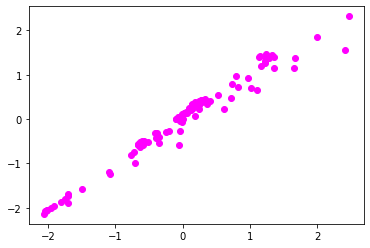

In [4]:
normalized_s=[]
normalized_sY=[]
normalized_s = (s-np.mean(s))/(np.var(s)**0.5)
normalized_sY = (sY-np.mean(sY))/(np.var(sY)**0.5)
print('Нормализованные точки по х:',normalized_s)
print('Нормализованные точки по у:',normalized_sY)
plt.scatter(normalized_s, normalized_sY, color='magenta')
plt.show()

### Задание №2.
Определить «грубую» верхнюю оценку количества кластеров k


In [5]:
K=math.floor(math.sqrt(n/2))
print('грубая верхняя оценка количества кластеров: ', K)


грубая верхняя оценка количества кластеров:  7


### Задание №3.
Реализовать алгоритм k-means. Отобразить полученные кластеры, каждый кластер выделить разным цветом или маркером, отметить центроиды.

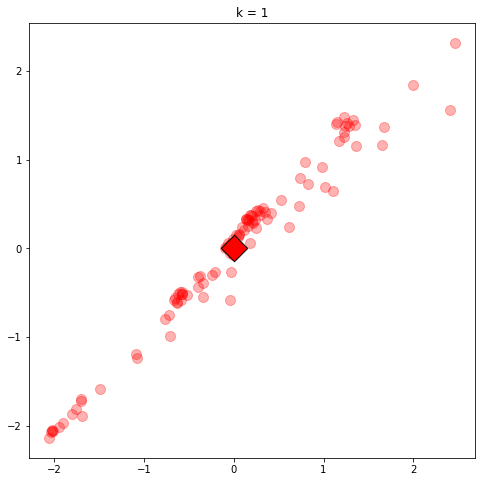

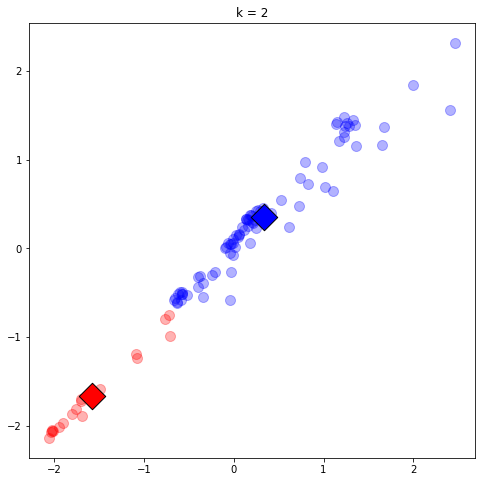

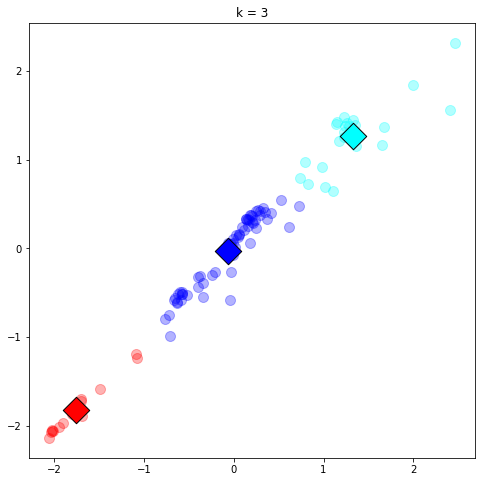

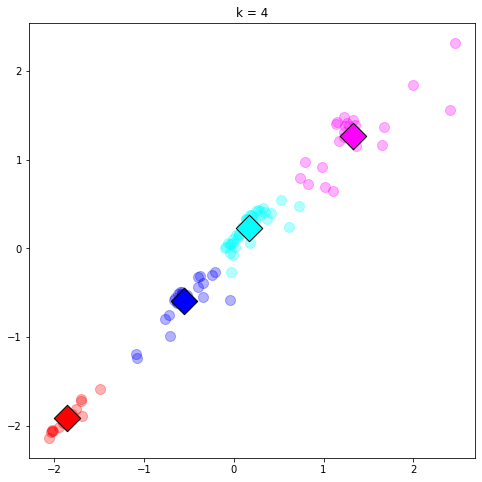

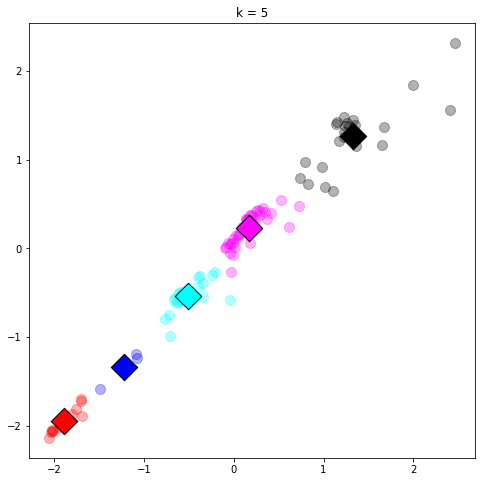

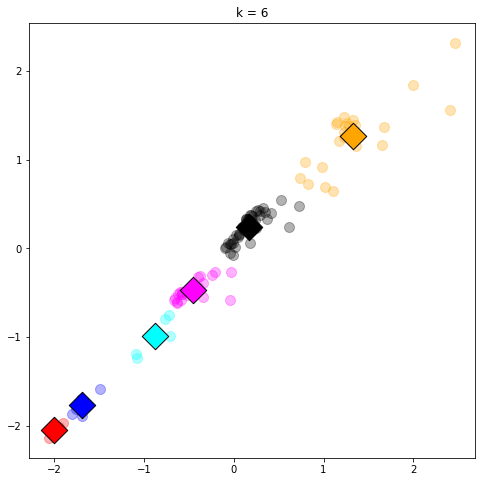

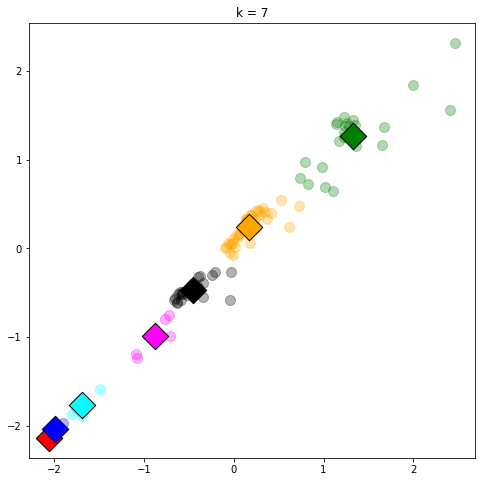

In [6]:
Centers = [[[normalized_s[1], normalized_sY[1]]],
     [[normalized_s[1], normalized_sY[1]],[normalized_s[2], normalized_sY[2]]],
     [[normalized_s[1], normalized_sY[1]],[normalized_s[2], normalized_sY[2]],[normalized_s[3], normalized_sY[3]]],
     [[normalized_s[1], normalized_sY[1]],[normalized_s[2], normalized_sY[2]],[normalized_s[3], normalized_sY[3]],[normalized_s[4], normalized_sY[4]]],
     [[normalized_s[1], normalized_sY[1]],[normalized_s[2], normalized_sY[2]],[normalized_s[3], normalized_sY[3]],[normalized_s[4], normalized_sY[4]],[normalized_s[5], normalized_sY[5]]],
     [[normalized_s[1], normalized_sY[1]],[normalized_s[2], normalized_sY[2]],[normalized_s[3], normalized_sY[3]],[normalized_s[4], normalized_sY[4]],[normalized_s[5], normalized_sY[5]],[normalized_s[6], normalized_sY[6]]],
     [[normalized_s[1], normalized_sY[1]],[normalized_s[2], normalized_sY[2]],[normalized_s[3], normalized_sY[3]],[normalized_s[4], normalized_sY[4]],[normalized_s[5], normalized_sY[5]],[normalized_s[6], normalized_sY[6]],[normalized_s[7], normalized_sY[7]]]]   
def k_means(sX, sY, k, centroids):
    while True:
        clusters = [[] for i in range(k)]
        centroids1 = centroids.copy()
        for j in range(len(sX)):
            D = [((sX[j]-centroids[i][0])**2 + (sY[j]-centroids[i][1])**2)**0.5 for i in range(k)]
            clusters[np.argmin(D)].append([sX[j],sY[j]])
        for i in range(k):
            centroids[i] = (np.mean(np.array(clusters[i])[:,0]),np.mean(np.array(clusters[i])[:,1]))
        if centroids1 == centroids:
            break
    return centroids, clusters
def plot(centers, clusters):
    colors = ['red','blue','cyan', 'magenta', 'black', 'orange', 'green', 'purple']
    dots1,dots2 = plt.subplots(figsize=(8, 8))
    for i in range(len(centers)):
        dots2.scatter(np.array(clusters[i])[:,0], np.array(clusters[i])[:,1], s=100, c=colors[i],alpha=0.3)
        dots2.scatter(centers[i][0], centers[i][1], marker='D', c=colors[i], s=350, edgecolors = 'k')
    dots2.set_title('k = %i'%(i+1))
    dots2.set_axisbelow(True)
    plt.show()
for k in range(1, K+1):
    centroids, clusters = k_means(normalized_s, normalized_sY, k, Centers[k-1])
    plot(centroids, clusters)


### Задание №4.
Реализовать алгоритм k-medoids. Отобразить полученные кластеры, каждый кластер выделить разным цветом или маркером, отметить центроиды.

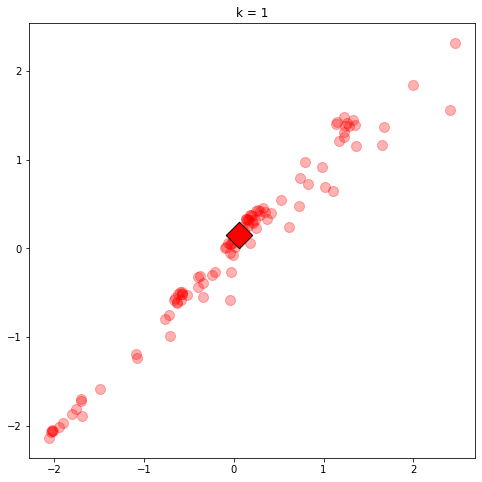

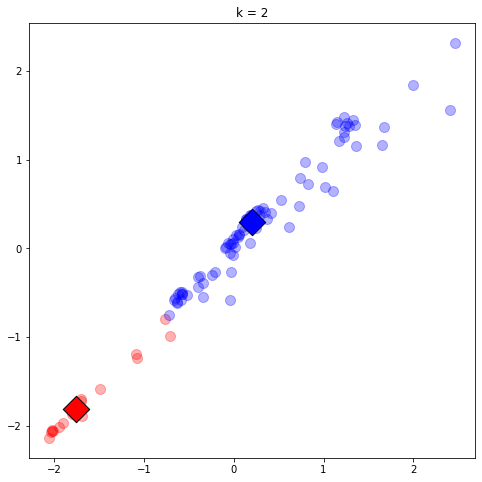

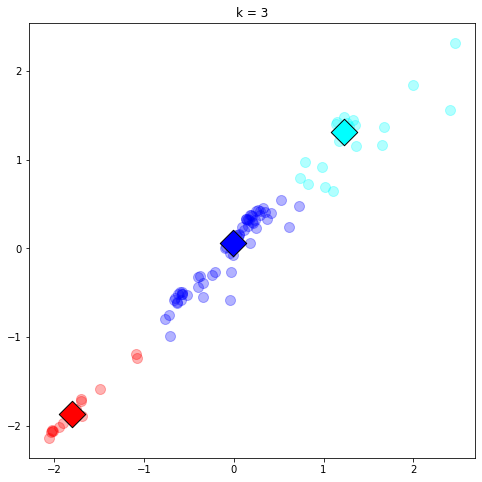

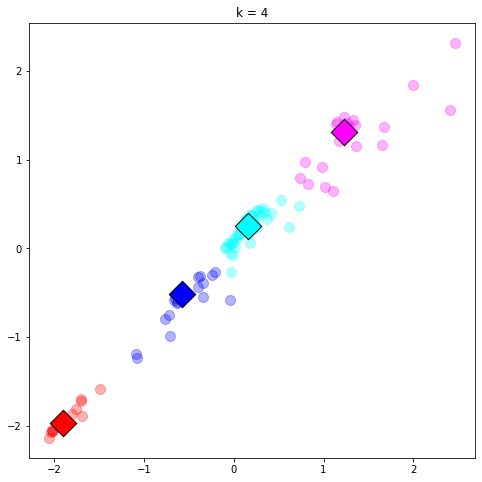

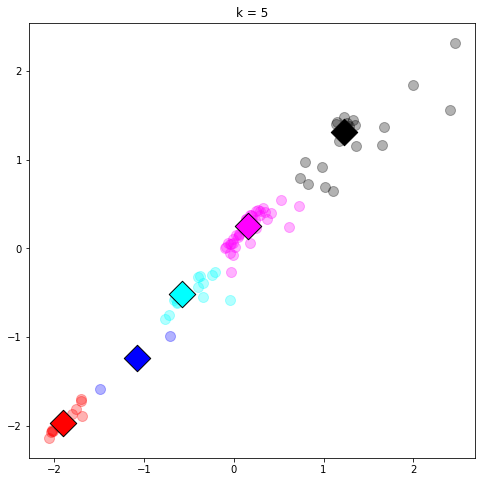

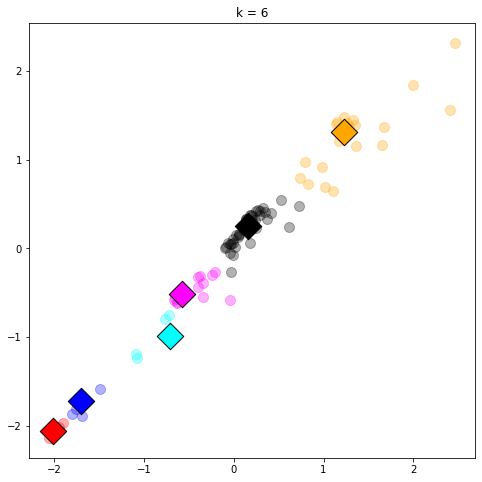

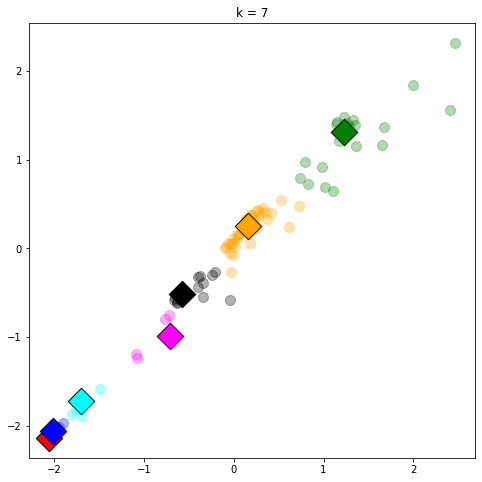

In [7]:
def k_medoids(x, y, k, centroids):
    while True:
        clusters = [[] for i in range(k)]
        centroids1 = centroids.copy()
        for j in range(len(x)):
            D = [((x[j]-centroids[i][0])**2 + (y[j]-centroids[i][1])**2)**0.5 for i in range(k)]
            clusters[np.argmin(D)].append([x[j],y[j]])
        for i in range(k):
            medoid = np.argmin([np.mean([((clusters[i][a][0]-clusters[i][b][0])**2+(clusters[i][a][1]-clusters[i][b][1])**2)**0.5 for a in range(len(clusters[i]))]) for b in range(len(clusters[i]))])
            centroids[i] = (clusters[i][medoid][0], clusters[i][medoid][1])
        if centroids1 == centroids:
            break
    return centroids, clusters
for k in range(1, K+1):
    centroids, clusters = k_medoids(normalized_s, normalized_sY, k, Centers[k-1])
    plot(centroids, clusters)

### Задание №5. 
Для каждого метода заполнить таблицу, где $k \in [1, \tilde{k}]$

In [8]:
##k-means
table1=PrettyTable()
table2=PrettyTable()
table1.add_column('Значение k',[1,2,3,4,5,6,7])
table2.add_column('Значение k',[1,2,3,4,5,6,7])
str1=[]
str2=[]
str3=[]
str4=[]
for k in range(1,K+1):
    F=k_means(normalized_s, normalized_sY, k, Centers[k-1])
    F1=k_medoids(normalized_s, normalized_sY, k, Centers[k-1])
    str1.append(np.round(k_means(normalized_s, normalized_sY, k, Centers[k-1])[0],4))
    str2.append([len(i) for i in F[1]])
    str3.append(np.round(k_medoids(normalized_s, normalized_sY, k, Centers[k-1])[0],4))
    str4.append([len(i) for i in F1[1]])
table1.add_column('Центроиды кластера x_Ci',str1)
table1.add_column('Объем кластера #C_i', str2)
print('Метод k-means\n',table1)


Метод k-means
 +------------+-------------------------+--------------------------+
| Значение k | Центроиды кластера x_Ci |   Объем кластера #C_i    |
+------------+-------------------------+--------------------------+
|     1      |       [[-0.  0.]]       |          [102]           |
|     2      |    [[-1.5865 -1.6606]   |         [18, 84]         |
|            |    [ 0.34    0.3558]]   |                          |
|     3      |    [[-1.7573 -1.8235]   |       [15, 64, 23]       |
|            |     [-0.0668 -0.0303]   |                          |
|            |    [ 1.3319  1.2736]]   |                          |
|     4      |    [[-1.8605 -1.9176]   |     [13, 24, 42, 23]     |
|            |     [-0.558  -0.5882]   |                          |
|            |     [ 0.1653  0.2322]   |                          |
|            |    [ 1.3319  1.2736]]   |                          |
|     5      |    [[-1.8911 -1.9455]   |   [12, 4, 22, 41, 23]    |
|            |     [-1.0948 -1.24

In [9]:
##k-medians
table2.add_column('Центроиды кластера x_Ci',str3)
table2.add_column('Объем кластера #C_i', str4)
print('Метод k-medians\n',table2)

Метод k-medians
 +------------+-------------------------+--------------------------+
| Значение k | Центроиды кластера x_Ci |   Объем кластера #C_i    |
+------------+-------------------------+--------------------------+
|     1      |    [[0.0579 0.149 ]]    |          [102]           |
|     2      |    [[-1.7543 -1.8103]   |         [17, 85]         |
|            |    [ 0.2078  0.3004]]   |                          |
|     3      |    [[-1.8009 -1.8637]   |       [15, 64, 23]       |
|            |     [-0.0055  0.0621]   |                          |
|            |    [ 1.2284  1.3181]]   |                          |
|     4      |    [[-1.91   -1.9673]   |     [13, 24, 42, 23]     |
|            |     [-0.5792 -0.5167]   |                          |
|            |     [ 0.1525  0.2528]   |                          |
|            |    [ 1.2284  1.3181]]   |                          |
|     5      |    [[-1.91   -1.9673]   |   [12, 4, 21, 42, 23]    |
|            |     [-1.0781 -1.

### Задание №6. 
С помощью метода локтя выявить для каждого метода оптимальное количество кластеров.

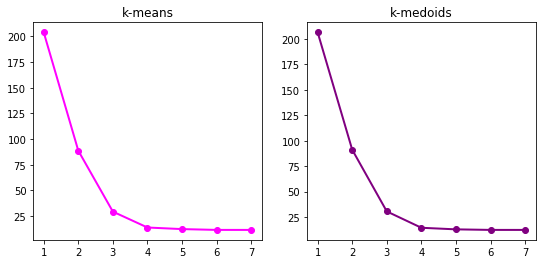

In [10]:
x = []
y = []
y1 = []
for k in range(K):
    x.append(k+1)
    centroids, clusters = k_means(normalized_s, normalized_sY, k+1, Centers[k])
    y.append(sum([sum([(centroids[j][0]-i[0])**2+(centroids[j][1]-i[1])**2 for i in clusters[j]]) for j in range(len(clusters))]))
    centroids, clusters = k_medoids(normalized_s, normalized_sY, k+1, Centers[k])
    y1.append(sum([sum([(centroids[j][0]-i[0])**2+(centroids[j][1]-i[1])**2 for i in clusters[j]]) for j in range(len(clusters))]))
p1, p = plt.subplots(1,2,figsize=(9, 4))
p[0].plot(x, y, marker='o',color='magenta', linewidth=2)
p[1].plot(x, y1, marker='o',color='purple', linewidth=2)
p[0].set_title('k-means')
p[1].set_title('k-medoids')
plt.show()

### Вывод
Оптимальное количество кластеров для обоих алгоритмов для данных точек = 3.

### Задание №7.
Реализовать алгоритм поиска сгущений при различных радиусах R, отобразить полученные кластеры, выделить каждый кластер разным цветом или маркером, отметить центроиды. Результаты представить в виде таблицы.

In [67]:
def forel(sX, sY, R):
    centroids = []
    clusters = []
    s = [[sX[i], sY[i]] for i in range(n)]
    while True:
        x1 = s[0]
        while True:
            k1 = [s[i] for i in range(len(s)) if ((x1[0]-s[i][0])**2 + (x1[1]-s[i][1])**2)**0.5 <= R]
            x2 = [sum(np.array(k1)[:,0])/len(k1), sum(np.array(k1)[:,1])/len(k1)]
            if x1 == x2:
                break
            x1 = x2.copy()
        s = [i for i in s if i not in k1]
        centroids.append(x1)
        clusters.append(k1)
        if len(s) == 0:
            return centroids,clusters

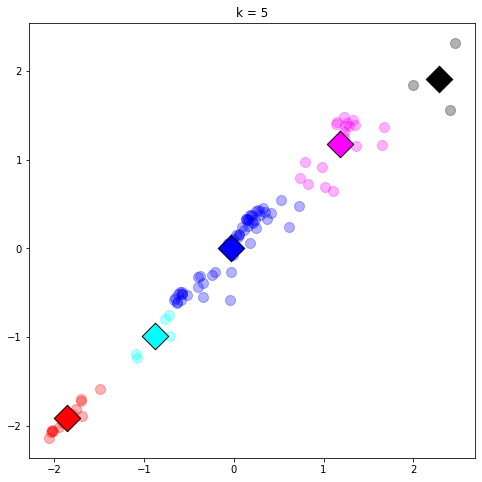

0.912277922294889


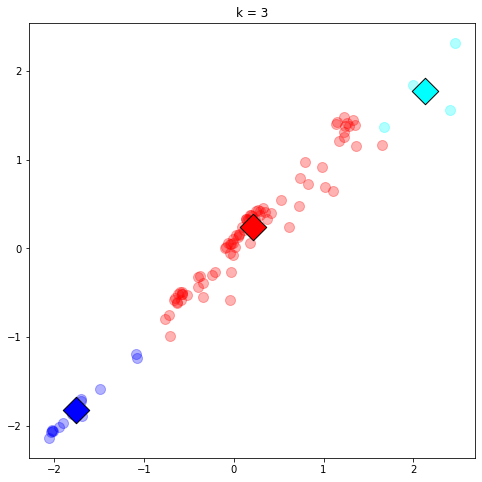

1.819079701160788


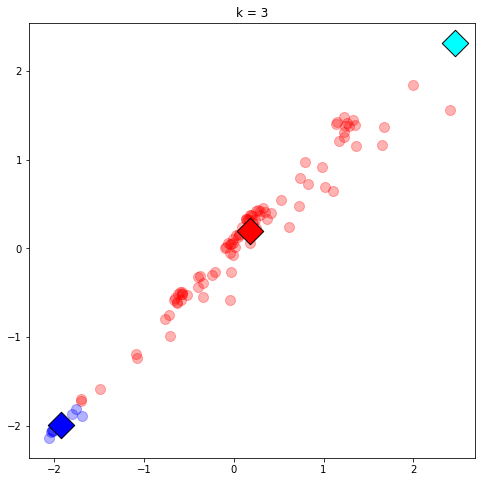

2.725881480026687


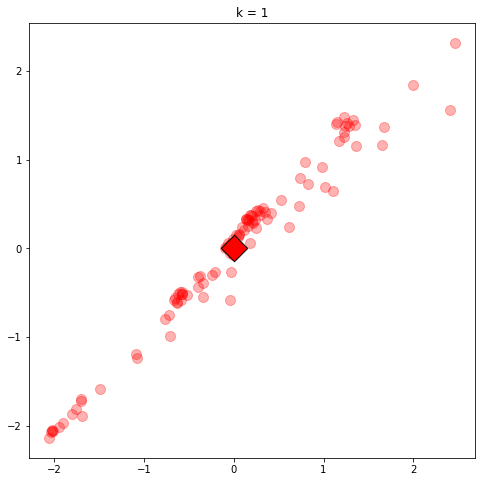

3.6326832588925857


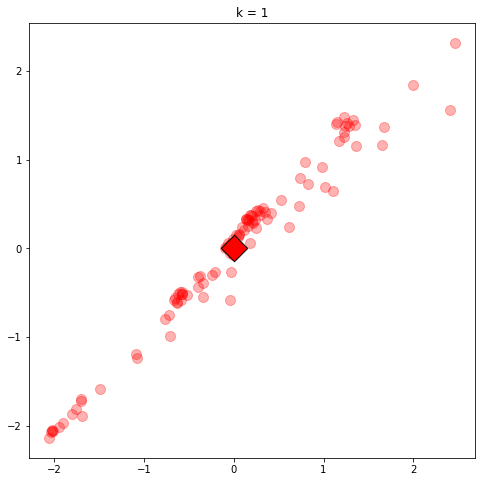

4.539485037758484


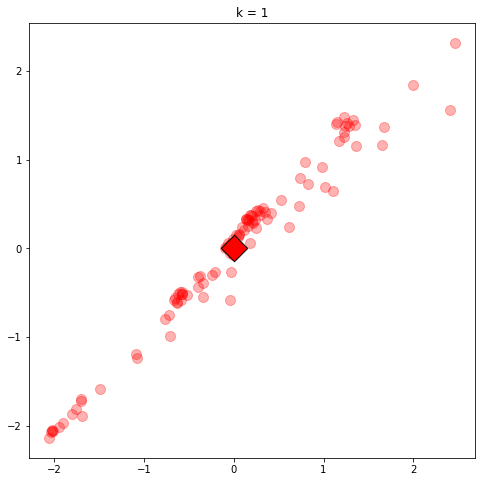

5.446286816624383


In [68]:
R_max=-100000
R_min=100000
for i in range(n):
    for j in range(i+1, n):
        D_=np.sqrt((normalized_s[i]-normalized_s[j])**2+(normalized_sY[i]-normalized_sY[j])**2)
        if  D_>0:
            if D_<R_min:
                R_min=D_
            if D_>R_max:
                R_max=D_
h=(R_max-R_min)/7
arrayR=[]
centr, length=[],[]
## Возьмем равноотстоящие точки R лежащие в интервале от Rmin до Rmax
R=R_min+h
centr, arr_len=[],[]
while R_max-R>0.000001:
    f=forel(normalized_s, normalized_sY, R)
    arrayR.append(R)
    centr.append(np.round(f[0],4))
    length.append([len(i) for i in f[1]])
    plot(f[0], f[1])
    print(R)
    R+=h

In [69]:
table3=PrettyTable()
table3.add_column('Значение R',arrayR)
table3.add_column('Центроиды кластера x_Ci',centr)
table3.add_column('Объем кластера #C_i', length)
print(table3)


+--------------------+-------------------------+---------------------+
|     Значение R     | Центроиды кластера x_Ci | Объем кластера #C_i |
+--------------------+-------------------------+---------------------+
| 0.912277922294889  |    [[-1.8605 -1.9176]   |  [13, 61, 5, 20, 3] |
|                    |     [-0.0341  0.0098]   |                     |
|                    |     [-0.874  -0.9924]   |                     |
|                    |     [ 1.1881  1.1785]   |                     |
|                    |    [ 2.2906  1.9081]]   |                     |
| 1.819079701160788  |    [[ 0.2146  0.244 ]   |     [83, 15, 4]     |
|                    |     [-1.7573 -1.8235]   |                     |
|                    |    [ 2.1365  1.7742]]   |                     |
| 2.725881480026687  |    [[ 0.1848  0.1935]   |     [91, 10, 1]     |
|                    |     [-1.9285 -1.9928]   |                     |
|                    |    [ 2.4662  2.3214]]   |                     |
| 3.63

### Задание №8.
Проверить чувствительность метода поиска сгущений к погрешностям. Сделать выводы.

Возьмем $\varepsilon = 0.001$ и пересчитаем кластеры

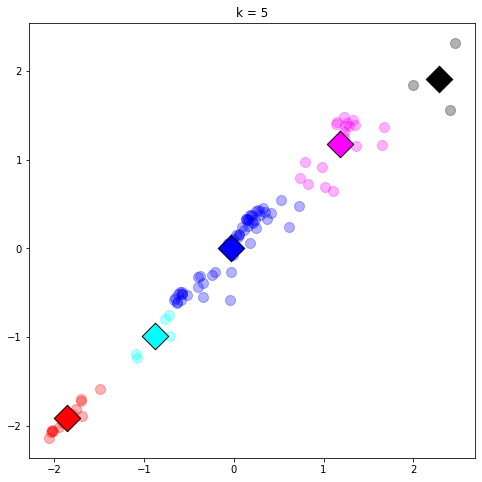

0.913277922294889


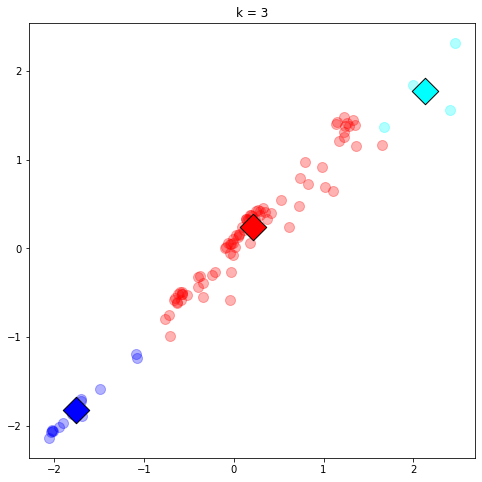

1.8200797011607879


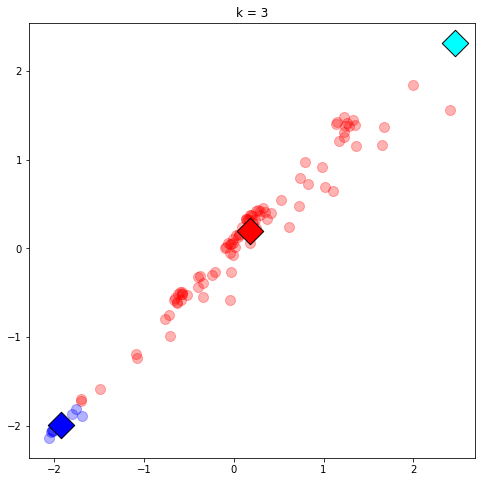

2.7268814800266865


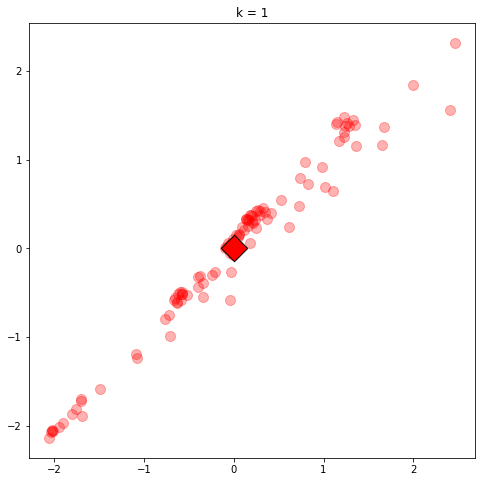

3.633683258892585


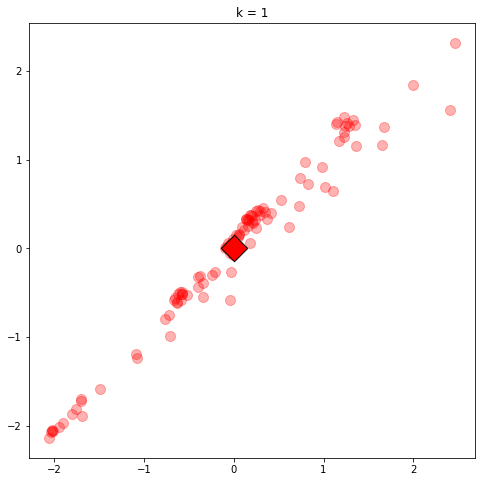

4.540485037758484


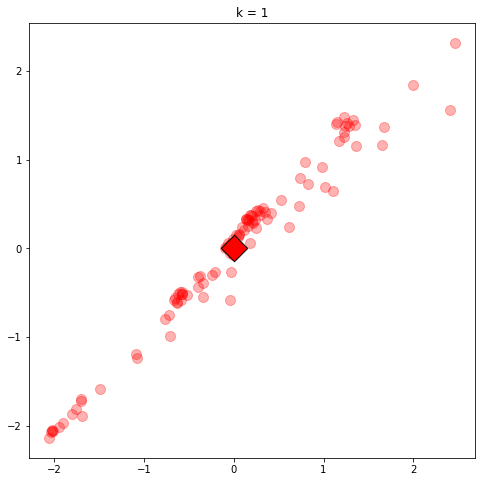

5.447286816624382


In [70]:
arrayR=[]
centr, length=[],[]
R=R_min+h+0.001
arr_centers, arr_len=[],[]
while R_max-R>0.000001:
    f=forel(normalized_s, normalized_sY, R)
    arrayR.append(R)
    centr.append(np.round(f[0],4))
    length.append([len(i) for i in f[1]])
    plot(f[0], f[1])
    print(R)
    R+=h
table4=PrettyTable()
table4.add_column('Значение R',arrayR)
table4.add_column('Центроиды кластера x_Ci',centr)
table4.add_column('Объем кластера #C_i', length)

In [71]:
print(table4)

+--------------------+-------------------------+---------------------+
|     Значение R     | Центроиды кластера x_Ci | Объем кластера #C_i |
+--------------------+-------------------------+---------------------+
| 0.913277922294889  |    [[-1.8605 -1.9176]   |  [13, 61, 5, 20, 3] |
|                    |     [-0.0341  0.0098]   |                     |
|                    |     [-0.874  -0.9924]   |                     |
|                    |     [ 1.1881  1.1785]   |                     |
|                    |    [ 2.2906  1.9081]]   |                     |
| 1.8200797011607879 |    [[ 0.2146  0.244 ]   |     [83, 15, 4]     |
|                    |     [-1.7573 -1.8235]   |                     |
|                    |    [ 2.1365  1.7742]]   |                     |
| 2.7268814800266865 |    [[ 0.1848  0.1935]   |     [91, 10, 1]     |
|                    |     [-1.9285 -1.9928]   |                     |
|                    |    [ 2.4662  2.3214]]   |                     |
| 3.63

### Вывод
* Из таблиц следует, что метод поиска сгущений не чувствителен к погрешностям.  
* Центроиды кластеров и объемы кластеров при увеличении R на 0.001 не изменились

### Задание №9.
Сравнить методы. Сделать выводы.

Из полученных результатов методом локтя оптимальное количество кластеров для k-means и k-medoids равно 3.
Различия между кластерами, полученными с помощью этих методов, незначительны.
По полученной таблице метода поиска сгущений где R, лежит в промежутке от Rmin до Rmax видно, встречается разделение на несколько кластеров , среди которых есть один большой и остальные поменьше это происходит из за того что основное кол-во точек располагается примерно в центре графика.Следовательно ,для нашей выборки более удачно использовать методы k-means или k-medoids

## Выводы
В ходе практической работы было выполнено разбиение исходного множества объектов на конечное число подмножеств(кластеров) с использованием метода k-means, k-medians  
С помощью метода силуэтов для каждого метода было выявлено оптимальное количество кластеров.  
Был реализован алгоритм поиска сгущений при различных радиусах 𝑅.  
Была проверена чувствительность метода поиска сгущений к погрешностям.  
Сделаны выводы по методам 